In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime

In [2]:
def str_to_datetime(timestamp):
  date_parts = timestamp.split('-')
  year, month, day = int(date_parts[0]), int(date_parts[1]), int(date_parts[2])
  return datetime.datetime(year=year, month=month, day=day)

In [3]:
ticker = 'EMBR3'

dataset_path = f"data/stock-data/{ticker}.SAO.csv"
base_df = pd.read_csv(dataset_path)
# base_df = base_df[["timestamp", "close"]]
base_df["timestamp"] = base_df["timestamp"].apply(str_to_datetime)
# base_df.index = base_df.pop("timestamp")

In [ ]:
column_names = np.array(["volume-3","volume-2","volume-1","close-3", "close-2", "close-1", "close"])

df = pd.DataFrame(columns=column_names)

for index, row in base_df.iterrows():
    if index < len(base_df) -4 :
        df.loc[index] = [
            base_df.iloc[index + 3, 6:7].values[0],
            base_df.iloc[index + 2, 6:7].values[0],
            base_df.iloc[index + 1, 6:7].values[0],
            base_df.iloc[index + 3, 4:5].values[0],
            base_df.iloc[index + 2, 4:5].values[0],
            base_df.iloc[index + 1, 4:5].values[0],
            row["close"]
        ]
df

In [13]:
column_names

['volume-3', 'volume-2', 'volume-1', 'close-3', 'close-2', 'close-1', 'close']

##### METHOD - assemble data-frame with historical values

In [96]:
def assemble_data_frame(hist_len, base_df):
    col_headers = np.array(["timestamp-0"])

    for n in reversed(range(0, hist_len + 1)):
        col_headers = np.append(col_headers, np.array([(f"volume-{n}", f"close-{n}")]))

    df = pd.DataFrame(columns=col_headers)

    for i, row in base_df.iterrows():
        if i < len(base_df) - (hist_len + 1):
            for header in col_headers:
                base_df_header, daily_delay = header.split("-")
                df.loc[i, header] = base_df.loc[i + int(daily_delay), base_df_header]

    df.rename(columns={"timestamp-0": "timestamp"}, inplace=True)
    df.index = df.pop("timestamp")

    print(df)
    # for header in col_headers:
    #     print(header)

In [98]:
ticker = 'BTOW3'

dataset_path = f"data/stock-data/{ticker}.SAO.csv"
base_df = pd.read_csv(dataset_path)
base_df["timestamp"] = base_df["timestamp"].apply(str_to_datetime)
assemble_data_frame(5, base_df)

           volume-5 close-5 volume-4 close-4 volume-3 close-3 volume-2  \
timestamp                                                                
2021-08-03      500     2.5      200     3.0      100     3.0      200   
2021-07-22      100     3.1      500     2.5      200     3.0      100   
2021-07-14      100     2.9      100     3.1      500     2.5      200   
2021-07-01      130     4.0      100     2.9      100     3.1      500   
2021-06-29     1101     4.2      130     4.0      100     2.9      100   
...             ...     ...      ...     ...      ...     ...      ...   
2008-08-15      500    0.85      500    0.85     2000    0.85     4500   
2008-08-08    10000    0.85      500    0.85      500    0.85     2000   
2008-08-07     4000     0.8    10000    0.85      500    0.85      500   
2008-08-06      500     0.8     4000     0.8    10000    0.85      500   
2008-08-05    15000     0.8      500     0.8     4000     0.8    10000   

           close-2 volume-1 close-1 v

In [61]:
st = 'close-1'
prop, place = st.split('-')

int(place)

1

In [5]:
# Load the dataset
# data = pd.read_csv('data/stock-data/AZUL4.SAO.csv')

# Define features and target variable
features = df[["volume-3","volume-2","volume-1","close-3", "close-2", "close-1"]]  # Add all relevant columns here
target = df['close']  # Assuming you want to predict close_value

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)

In [7]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = model.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.15659639990517488


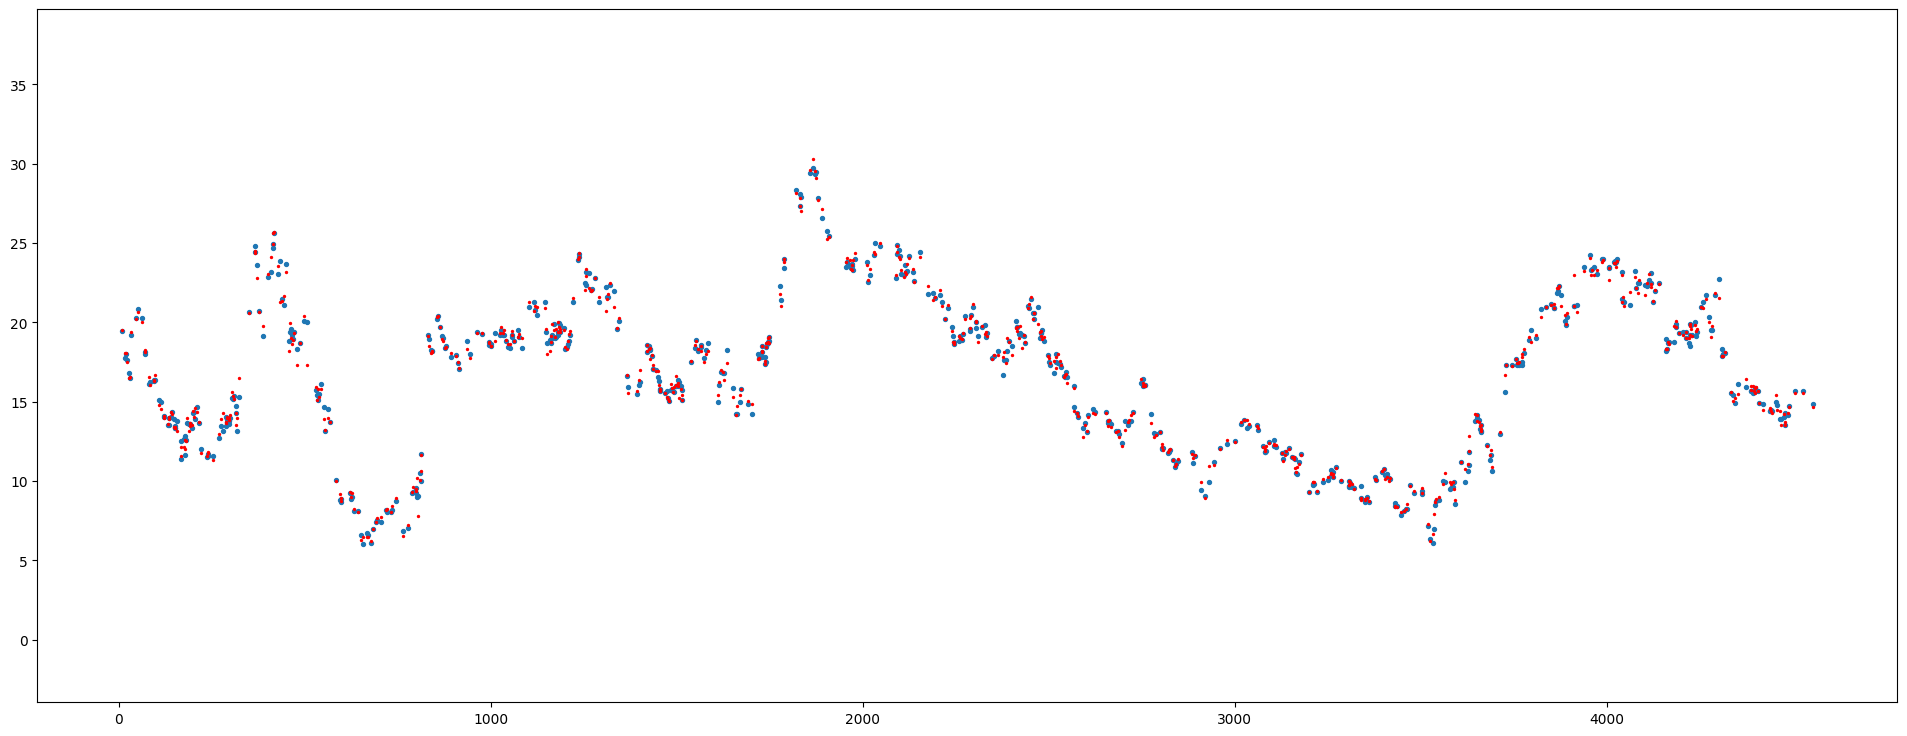

In [12]:
from matplotlib import pyplot as plt

index = [i for i in range(230)]

plt.figure(figsize=(24,9))
plt.ylim(y_test.min() - 10, y_test.max() +10)
# plt.ylim(20, 33)
# plt.xlim(4450, 4500)
# plt.grid(color='gray', linestyle='--', linewidth=0.2)

plt.scatter(y_test.index, y_test, s=8)
plt.scatter(y_test.index, predictions, s=2, c='red')
# plt.plot(df.index, df.iloc[:,4:5],color='gray')
# plt.plot(data.index, data.iloc[:,3:4], color='gray', linewidth=0.5)

# plt.plot(index, data.iloc[:307,5:6], color='gray', linewidth=2)

In [9]:
# Create a new DataFrame with the features for the future time period
future_data = pd.DataFrame({
    'open': predictions,
    'close': [future_amount],
    'volume': [future_dividend],
    # Add other features
})

# Use the trained model to predict the close value for the future data
predicted_close = model.predict(future_data)


NameError: name 'future_open_value' is not defined